# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import tools as t
import models as m
import hyperband as hp

Using TensorFlow backend.


In [2]:
configs,lcs,Y = t.load_data(scale_configs = True)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)

scaling configuration data
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


###    Testing models (mlp, lstm, multi_lstm)

In [14]:
cfg = {'lr': 0.12413831388014755, 'batch_size': 20}
model = m.mlp(cfg['lr'])

In [9]:
m.train_mlp(model, configs, Y, cfg, split=200, epochs=100)
mse = m.eval_mlp(model, configs, Y, split=200, batch_size=20)

Train on 200 samples, validate on 65 samples
Epoch 1/100
200/200 [==============================] - 0s 151us/step - loss: 0.0042 - val_loss: 0.0067
Epoch 2/100
200/200 [==============================] - 0s 146us/step - loss: 0.0042 - val_loss: 0.0066
Epoch 3/100
200/200 [==============================] - 0s 251us/step - loss: 0.0041 - val_loss: 0.0068
Epoch 4/100
200/200 [==============================] - 0s 234us/step - loss: 0.0041 - val_loss: 0.0064
Epoch 5/100
200/200 [==============================] - 0s 231us/step - loss: 0.0040 - val_loss: 0.0062
Epoch 6/100
200/200 [==============================] - 0s 364us/step - loss: 0.0041 - val_loss: 0.0064
Epoch 7/100
200/200 [==============================] - 0s 245us/step - loss: 0.0039 - val_loss: 0.0065
Epoch 8/100
200/200 [==============================] - 0s 268us/step - loss: 0.0040 - val_loss: 0.0067
Epoch 9/100
200/200 [==============================] - 0s 240us/step - loss: 0.0039 - val_loss: 0.0058
Epoch 10/100
200/200 [======

200/200 [==============================] - 0s 260us/step - loss: 0.0026 - val_loss: 0.0054
Epoch 80/100
200/200 [==============================] - 0s 255us/step - loss: 0.0027 - val_loss: 0.0058
Epoch 81/100
200/200 [==============================] - 0s 349us/step - loss: 0.0024 - val_loss: 0.0056
Epoch 82/100
200/200 [==============================] - 0s 246us/step - loss: 0.0026 - val_loss: 0.0054
Epoch 83/100
200/200 [==============================] - 0s 282us/step - loss: 0.0026 - val_loss: 0.0050
Epoch 84/100
200/200 [==============================] - 0s 248us/step - loss: 0.0025 - val_loss: 0.0061
Epoch 85/100
200/200 [==============================] - 0s 253us/step - loss: 0.0024 - val_loss: 0.0063
Epoch 86/100
200/200 [==============================] - 0s 297us/step - loss: 0.0026 - val_loss: 0.0062
Epoch 87/100
200/200 [==============================] - 0s 215us/step - loss: 0.0024 - val_loss: 0.0066
Epoch 88/100
200/200 [==============================] - 0s 277us/step - loss:

In [15]:
model = m.lstm()

build lstm with input_dim: 1


In [19]:
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
m.train_lstm_split(model, lcs, Y, steps=(5,5), split=200, batch_size=20, epochs=5)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)
# def train_lstm(model, X, Y, steps, idx, batch_size, epochs, callbacks = None):

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)
train lstm without consideration of configs
Train on 200 samples, validate on 65 samples
Epoch 1/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 2/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 5/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


In [21]:
mse = m.eval_lstm_split(model, lcs, Y, steps=20, split=200, batch_size=20)

evaluate lstm without consideration of configs
65/65 [==============================] - 0s 1ms/step
mse:  0.01702217858


In [22]:
model = m.multi_lstm(lr=0.01)
print("lcs:", lcs.shape, "configs:", configs.shape, "Y", Y.shape)

lcs: (265, 40, 1) configs: (265, 5) Y (265, 1)


In [23]:
m.train_lstm_split(model, [configs, lcs], Y, steps=(5,5), split=200, batch_size=20, epochs=10)

train lstm with consideration of configs
Train on 200 samples, validate on 65 samples
Epoch 1/10
200/200 [==============================] - 2s 12ms/step - loss: 0.2152 - mean_squared_error: 0.2152 - val_loss: 0.0877 - val_mean_squared_error: 0.0877
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0612 - mean_squared_error: 0.0612 - val_loss: 0.0494 - val_mean_squared_error: 0.0494
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0091 - mean_squared_error: 

In [27]:
mse = m.eval_lstm_split(model, [configs, lcs], Y, steps=5, split=200, batch_size=20)
# mse = m.eval_multi_lstm(model, configs, lcs, Y, steps=20, split=200, batch_size=5)

evaluate lstm with consideration of configs
65/65 [==============================] - 0s 842us/step
mse:  0.00400639268068


###    evaluating models with cross validation (ridge, XGB, mlp, lstm, multi_lstm)

In [151]:
cfg={'alpha':1.0}
results = m.eval_cv('ridge', configs, Y, cfg=cfg, splits = 3)

cross validate 0 epochs, train on 5 steps, validate on 5 steps
config {'alpha': 1.0}
MSE ridge: mean *** 0.02977 *** std: 0.0052
Result of all Folds: [-0.037  -0.0267 -0.0256]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [152]:
cfg = {'maxdepth': 10, 'lr': 0.08119864140758115, 'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 
       'n_estimators': 1000, 'subsample': 0.7946631901813815}
results = m.eval_cv('xgb', configs, Y, cfg=cfg, splits = 3)

cross validate 0 epochs, train on 5 steps, validate on 5 steps
config {'gamma': 0.007833441242813044, 'cols_bt': 0.9376450587145334, 'lr': 0.08119864140758115, 'maxdepth': 10, 'subsample': 0.7946631901813815, 'n_estimators': 1000}
MSE xgb: mean *** 0.00705 *** std: 0.0017
Result of all Folds: [-0.0088 -0.0048 -0.0075]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s finished


In [153]:
# evaluate via cross validation
cfg = {'lr': 0.2013474827989724, 'batch_size': 22, 'k_exp': 0.005043479631870928}
results = m.eval_cv('mlp', configs, Y, cfg=cfg, epochs=100, splits = 3, earlystop=False, dropout=True, lr_exp_decay=False)

cross validate 100 epochs, train on 5 steps, validate on 5 steps
config {'batch_size': 22, 'k_exp': 0.005043479631870928, 'lr': 0.2013474827989724}
create mlp using Dropout
create mlp using Dropout
create mlp using Dropout
MSE mlp: mean *** 0.01869 *** std: 0.0155
Result of all Folds: [-0.0081 -0.0406 -0.0074]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.1s finished


In [29]:
cfg = {'batch_size': 24}
results = m.eval_cv('lstm', lcs, Y, steps=(5,5), cfg=cfg, epochs=5, splits=4, earlystop=False)

cross validate 5 epochs, train on 5 steps, validate on 5 steps
config {'batch_size': 24}
build lstm with input_dim: 1
train lstm without consideration of configs
Train on 198 samples, validate on 67 samples
Epoch 1/5
198/198 [==============================] - 3s 15ms/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 2/5
198/198 [==============================] - 0s 2ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 3/5
198/198 [==============================] - 0s 2ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 4/5
198/198 [==============================] - 0s 3ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 5/5
198/198 [==============================] - 0s 3ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.0140 - val_mean_squared_e

In [30]:
cfg = {'batch_size': 12}
results = m.eval_cv('multi_lstm', [configs, lcs], Y, steps=(5,5), cfg=cfg, epochs=5, earlystop=True)

cross validate 5 epochs, train on 5 steps, validate on 5 steps
config {'batch_size': 12}
evaluating with early stopping
train lstm with consideration of configs
Train on 176 samples, validate on 89 samples
Epoch 1/5
176/176 [==============================] - 3s 16ms/step - loss: 0.1799 - mean_squared_error: 0.1799 - val_loss: 0.0721 - val_mean_squared_error: 0.0721
Epoch 2/5
176/176 [==============================] - 1s 4ms/step - loss: 0.0569 - mean_squared_error: 0.0569 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 3/5
176/176 [==============================] - 1s 5ms/step - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 4/5
176/176 [==============================] - 1s 4ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 5/5
176/176 [==============================] - 1s 4ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0060 - val_mean_squared_er

###    running hyperparameter optimisations

In [64]:
best_cfg = hp.optimize(configs,Y,model_type='xgb', min_budget = 1, max_budget=4, run_name='')

139794893321984
call cross_val_score 1 epochs, with config {'lr': 0.004714876890308628, 'n_estimators': 268, 'gamma': 0.26459522737088415, 'cols_bt': 0.7205813491511858, 'subsample': 0.7500236279889205, 'maxdepth': 4}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s finished


MSE xgb: mean *** 0.01951 *** std: 0.0033
Result of all Folds: [-0.024  -0.0165 -0.018 ]
call cross_val_score 1 epochs, with config {'lr': 0.16217257533644988, 'n_estimators': 217, 'gamma': 0.17353041959112092, 'cols_bt': 0.5018073452510072, 'subsample': 0.04435576765316558, 'maxdepth': 3}
MSE xgb: mean *** 0.01878 *** std: 0.0048
Result of all Folds: [-0.0255 -0.0157 -0.0151]
call cross_val_score 1 epochs, with config {'lr': 0.006511979192566196, 'n_estimators': 53, 'gamma': 0.5897426049071096, 'cols_bt': 0.8042770696688266, 'subsample': 0.6385951106142573, 'maxdepth': 6}
MSE xgb: mean *** 0.04247 *** std: 0.0027
Result of all Folds: [-0.0463 -0.0408 -0.0403]
call cross_val_score 1 epochs, with config {'lr': 0.0037685582632389246, 'n_estimators': 166, 'gamma': 0.24151871555037485, 'cols_bt': 0.2175434363842382, 'subsample': 0.42201710086334426, 'maxdepth': 7}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parall

MSE xgb: mean *** 0.03919 *** std: 0.0041
Result of all Folds: [-0.045  -0.0366 -0.036 ]
call cross_val_score 2 epochs, with config {'lr': 0.18041444469503112, 'n_estimators': 142, 'gamma': 0.05177245989145496, 'cols_bt': 0.6386477142624469, 'subsample': 0.42853431580055124, 'maxdepth': 8}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE xgb: mean *** 0.01129 *** std: 0.0002
Result of all Folds: [-0.0113 -0.0111 -0.0115]
call cross_val_score 2 epochs, with config {'lr': 0.004714876890308628, 'n_estimators': 268, 'gamma': 0.26459522737088415, 'cols_bt': 0.7205813491511858, 'subsample': 0.7500236279889205, 'maxdepth': 4}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


MSE xgb: mean *** 0.01951 *** std: 0.0033
Result of all Folds: [-0.024  -0.0165 -0.018 ]
call cross_val_score 2 epochs, with config {'lr': 0.16217257533644988, 'n_estimators': 217, 'gamma': 0.17353041959112092, 'cols_bt': 0.5018073452510072, 'subsample': 0.04435576765316558, 'maxdepth': 3}
MSE xgb: mean *** 0.01878 *** std: 0.0048
Result of all Folds: [-0.0255 -0.0157 -0.0151]
call cross_val_score 2 epochs, with config {'lr': 0.0020517177177551056, 'n_estimators': 63, 'gamma': 0.547330352964734, 'cols_bt': 0.19357107178162672, 'subsample': 0.5991884186547828, 'maxdepth': 10}
MSE xgb: mean *** 0.05713 *** std: 0.0032
Result of all Folds: [-0.0615 -0.0556 -0.0543]
call cross_val_score 4 epochs, with config {'lr': 0.16217257533644988, 'n_estimators': 217, 'gamma': 0.17353041959112092, 'cols_bt': 0.5018073452510072, 'subsample': 0.04435576765316558, 'maxdepth': 3}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished
/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


MSE xgb: mean *** 0.01878 *** std: 0.0048
Result of all Folds: [-0.0255 -0.0157 -0.0151]
call cross_val_score 4 epochs, with config {'lr': 0.18041444469503112, 'n_estimators': 142, 'gamma': 0.05177245989145496, 'cols_bt': 0.6386477142624469, 'subsample': 0.42853431580055124, 'maxdepth': 8}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s finished


MSE xgb: mean *** 0.01129 *** std: 0.0002
Result of all Folds: [-0.0113 -0.0111 -0.0115]
return best_cfg:  {'lr': 0.18041444469503112, 'n_estimators': 142, 'gamma': 0.05177245989145496, 'cols_bt': 0.6386477142624469, 'subsample': 0.42853431580055124, 'maxdepth': 8}


In [66]:
best_cfg = hp.optimize(configs,Y,model_type='mlp', min_budget = 1000, max_budget=4000, 
                       run_name='', earlystop=True)

139794893321984
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 42, 'lr': 0.016053361155360754}


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.9s finished


MSE mlp: mean *** 0.00788 *** std: 0.0009
Result of all Folds: [-0.0091 -0.0071 -0.0075]
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 40, 'lr': 0.0012751322028299946}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.7s finished


MSE mlp: mean *** 0.03327 *** std: 0.0098
Result of all Folds: [-0.0469 -0.0285 -0.0244]
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 17, 'lr': 0.0024363705871363653}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   28.6s finished


MSE mlp: mean *** 0.01800 *** std: 0.0048
Result of all Folds: [-0.0247 -0.0158 -0.0136]
evaluating with early stopping
call cross_val_score 1000 epochs, with config {'batch_size': 44, 'lr': 0.00323203530624004}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.0s finished


MSE mlp: mean *** 0.02694 *** std: 0.0091
Result of all Folds: [-0.0398 -0.0201 -0.021 ]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 27, 'lr': 0.0594683318735445}
Epoch 01459: early stopping
Epoch 01185: early stopping
Epoch 01131: early stopping
MSE mlp: mean *** 0.00579 *** std: 0.0008
Result of all Folds: [-0.0069 -0.0052 -0.0053]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 42, 'lr': 0.016053361155360754}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.8s finished
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.9s finished


MSE mlp: mean *** 0.00655 *** std: 0.0006
Result of all Folds: [-0.0074 -0.0059 -0.0064]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 17, 'lr': 0.0024363705871363653}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished


MSE mlp: mean *** 0.01052 *** std: 0.0028
Result of all Folds: [-0.0145 -0.0082 -0.0088]
evaluating with early stopping
call cross_val_score 2000 epochs, with config {'batch_size': 23, 'lr': 0.00011833479264203744}
Epoch 01692: early stopping
Epoch 01690: early stopping
Epoch 01760: early stopping
MSE mlp: mean *** 0.03513 *** std: 0.0099
Result of all Folds: [-0.049  -0.0303 -0.0262]
evaluating with early stopping
call cross_val_score 4000 epochs, with config {'batch_size': 42, 'lr': 0.016053361155360754}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   38.5s finished


Epoch 02270: early stopping
Epoch 02702: early stopping
Epoch 02280: early stopping
MSE mlp: mean *** 0.00676 *** std: 0.0006
Result of all Folds: [-0.0076 -0.0065 -0.0062]
evaluating with early stopping
call cross_val_score 4000 epochs, with config {'batch_size': 27, 'lr': 0.0594683318735445}


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.8s finished


Epoch 01461: early stopping
Epoch 01012: early stopping
Epoch 01015: early stopping
MSE mlp: mean *** 0.00588 *** std: 0.0005
Result of all Folds: [-0.0066 -0.0057 -0.0053]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min finished


return best_cfg:  {'batch_size': 27, 'lr': 0.0594683318735445}


In [4]:
best_cfg = hp.optimize(lcs, Y, model_type='lstm', 
                       min_budget = 10, max_budget=30, run_name='', earlystop=True)

139888802830080
evaluating with early stopping
call cross_val_score 15 epochs, with config {'batch_size': 3}
build lstm with input_dim: 1


/home/jochen/tensorflow/lib/python3.5/site-packages/sklearn/externals/joblib/parallel.py:547: UserWarning: Multiprocessing-backed parallel loops cannot be nested below threads, setting n_jobs=1
  **self._backend_args)


Epoch 1/15
evaluating with early stopping
call cross_val_score 15 epochs, with config {'batch_size': 1}
build lstm with input_dim: 1
Epoch 1/15
 81/176 [============>.................] - ETA: 9s - loss: 0.0190 - mean_squared_error: 0.0190

KeyboardInterrupt: 

176/176 [==============================] - 12s 67ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 2/15
158/176 [=========================>....] - ETA: 0s - loss: 0.0089 - mean_squared_error: 0.0089

In [3]:
best_cfg = hp.optimize([configs,lcs], Y, model_type='multi_lstm', 
                       min_budget = 2, max_budget=4, run_name='', earlystop=True)

140309731387136
cross validate 2 epochs, with config {'batch_size': 7}
evaluating with early stopping
Train on 176 samples, validate on 89 samples
Epoch 1/2
176/176 [==============================] - 2s 11ms/step - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 2/2
176/176 [==============================] - 1s 7ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Train on 177 samples, validate on 88 samples
Epoch 1/2
177/177 [==============================] - 1s 7ms/step - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 2/2
177/177 [==============================] - 1s 7ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Train on 177 samples, validate on 88 samples
Epoch 1/2
177/177 [==============================] - 1s 8ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_los

In [68]:
# experiment with concatenating the config to each data point of learning curve
timesteps = 5
configs,lcs,Y = t.load_lstm_data_concat_cfg(timesteps=timesteps)
model_type = 'lstm'
model = m.lstm(lcs[0][0].shape[0])
m.train_lstm(model, lcs, Y, split=200, batch_size=20, epochs=5)
mse = m.eval_lstm(model, lcs, Y, split=200, batch_size=20)

scaling configuration data
build lstm with input_dim: 6
Train on 200 samples, validate on 65 samples
Epoch 1/5
200/200 [==============================] - 3s 15ms/step - loss: 0.0743 - mean_squared_error: 0.0743 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 2/5
200/200 [==============================] - 0s 2ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 3/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 4/5
200/200 [==============================] - 1s 3ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 5/5
65/65 [==============================] - 0s 843us/step
mse:  0.00873059442697


## Sample learning curves

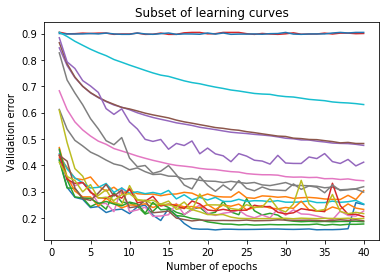

In [8]:
import numpy as np

n_subset=20
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

## Basic Data Exploration

### Histogram and CDF over the final error rate

265
[ 0.15153689  0.1515819   0.15282866  0.15434343  0.15650082  0.15954709
  0.15959183  0.16055092  0.16080048  0.16156045  0.16244856  0.16430366
  0.16470223  0.16500051  0.16504065  0.16676737  0.16724419  0.16746314
  0.16788982  0.16836734  0.16912972  0.1696      0.17007007  0.17097436
  0.17197581  0.17218749  0.17309483  0.17469136  0.17477876  0.17589213
  0.1771176   0.17717566  0.18051375  0.18429064  0.18561671  0.18614719
  0.18654372  0.1888912   0.18908462  0.18939709  0.19002079  0.19011057
  0.19062407  0.19251503  0.19269777  0.19512195  0.19799197  0.20191532
  0.2025641   0.20337261  0.20503018  0.20661408  0.2067056   0.20721804
  0.20923359  0.20958447  0.21048843  0.21072796  0.21152115  0.21208654
  0.21271271  0.21322007  0.21383838  0.21459538  0.2149739   0.21512623
  0.21656115  0.2168614   0.2173462   0.21915322  0.22029654  0.22293893
  0.22635376  0.22674772  0.22709083  0.23027569  0.23098019  0.23246412
  0.23264447  0.23268473  0.23302277  0.2333535

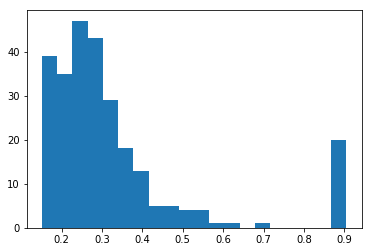

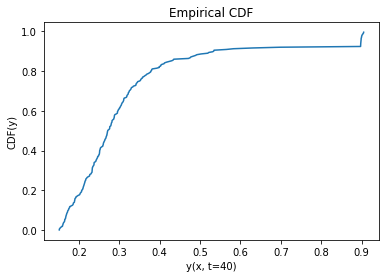

In [15]:
sorted = np.sort(learning_curves[:, -1])   # sorted list of final val error
print(len(sorted))
h = plt.hist(sorted, bins=20)
plt.show()

yvals = np.arange(len(sorted))/float(len(sorted))   # from 0 to 1 in 265 even steps
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

### Histogram and CDF over all error rates

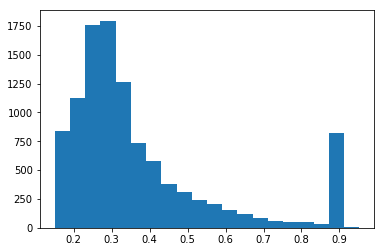

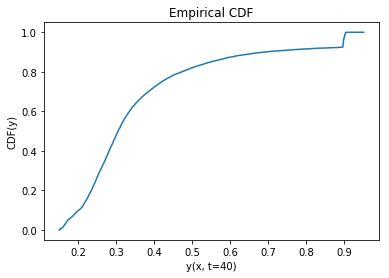

In [14]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()